In [1]:
from data_generator import generate_losangles, generate_edges
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tail_scratch_nn import DNN
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
quadrants = [0,1,2,3]
data_train = []
data_test = []
amount_train = 500 # Amount of data per class
amount_test = 100

In [3]:
for quadrant in quadrants:
    data_train.extend(generate_losangles(amount_train,quadrant))
    data_test.extend(generate_losangles(amount_test,quadrant))
    data_train.extend(generate_edges(amount_train,quadrant))
    data_test.extend(generate_edges(amount_test,quadrant))
    

In [4]:
data_train = np.array(data_train)
data_test = np.array(data_test)

In [5]:
X_train = data_train[:,[0,1]]
y_train = data_train[:,2]
x_test = data_test[:,[0,1]]
y_test = data_test[:,2]

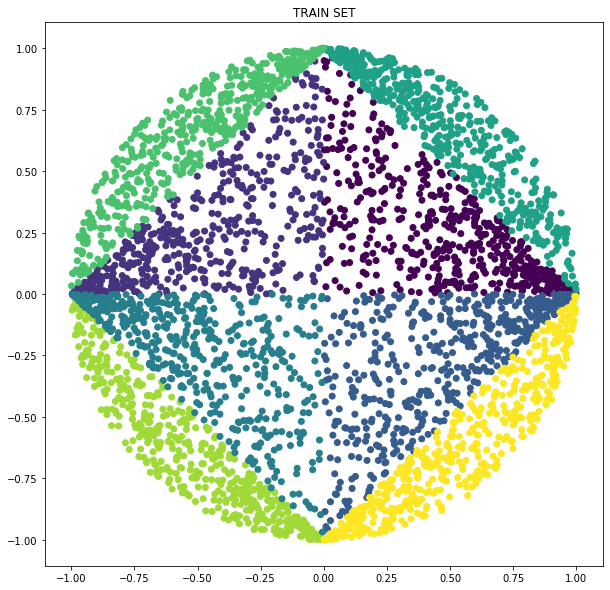

In [6]:
plt.figure(figsize=(10,10))
plt.title('TRAIN SET')
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

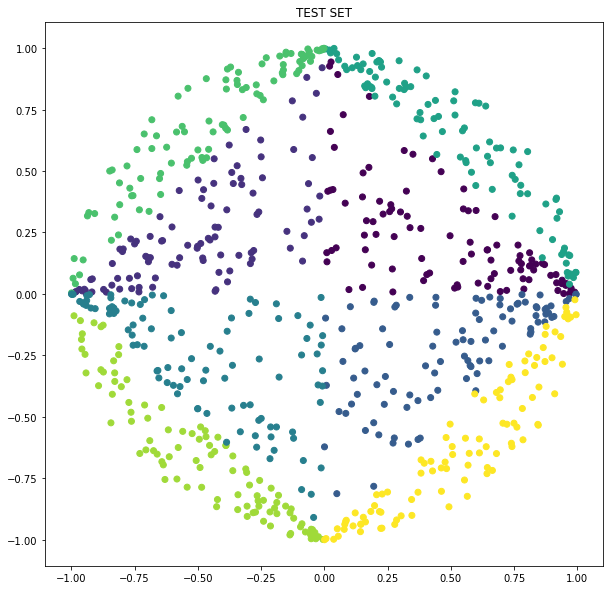

In [7]:
plt.figure(figsize=(10,10))
plt.title('TEST SET')
plt.scatter(x_test[:,0], x_test[:,1], c = y_test)

In [8]:
onehot = OneHotEncoder()

In [9]:
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = onehot.fit_transform(y_test.reshape(-1,1)).toarray()

***

In [10]:
neural_net = DNN()

In [11]:
neural_net.fit(X_train.T, y_train.T, x_test.T, y_test.T, hidden="relu", output="softmax")

EPOCH 0 Train cost : 2.07944161 | val cost : 2.07944149
EPOCH 10 Train cost : 2.06981562 | val cost : 2.06986672
EPOCH 20 Train cost : 1.97577937 | val cost : 1.97671724
EPOCH 30 Train cost : 1.73300117 | val cost : 1.7374309
EPOCH 40 Train cost : 1.35191363 | val cost : 1.36563549
EPOCH 50 Train cost : 1.02138804 | val cost : 1.03939053
EPOCH 60 Train cost : 0.80979475 | val cost : 0.8335257
EPOCH 70 Train cost : 0.63038783 | val cost : 0.65325804
EPOCH 80 Train cost : 0.48102678 | val cost : 0.4992879
EPOCH 90 Train cost : 0.3672696 | val cost : 0.38511
EPOCH 100 Train cost : 0.28928537 | val cost : 0.30980937
EPOCH 110 Train cost : 0.23747919 | val cost : 0.25925629
EPOCH 120 Train cost : 0.20400931 | val cost : 0.2276219
EPOCH 130 Train cost : 0.18084885 | val cost : 0.2055974
EPOCH 140 Train cost : 0.16490502 | val cost : 0.19238026
EPOCH 150 Train cost : 0.15307962 | val cost : 0.17844642
EPOCH 160 Train cost : 0.14120198 | val cost : 0.16683126
EPOCH 170 Train cost : 0.13623469 

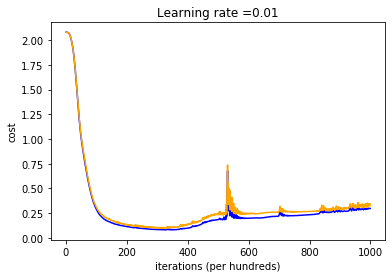

In [12]:
neural_net.train([2, 10, 10, 8], learning_rate=0.01, iterations=1000, adam_optimizer=True)

In [13]:
y_pred = neural_net.predict(x_test.T).T

In [14]:
np.argmax(y_pred, axis=1)

array([0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 1, 0,
       0, 1, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4,
       4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 4, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 0, 1, 5, 1, 1, 1, 1, 3,
       1, 1, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5,

In [15]:
np.argmax(y_test, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,

In [16]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.87375